In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#ok for this instead of predicting the raw values we will predict the difference of the target from the mean

In [5]:
train = pd.read_csv('Data/train_data_new.csv')
test = pd.read_csv('Data/test_data_new.csv')
# train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])
# test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])

train, test

(        sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  POS_ERR_FLOATMAG_BH  \
 0            0                 -3.0                 -3.0                  0.0   
 1            1                 -3.0                 -2.0                 -1.0   
 2            2                 -3.0                 -2.0                 -1.0   
 3            3                 -3.0                 -4.0                  1.0   
 4            4                 -3.0                 -1.0                 -2.0   
 ...        ...                  ...                  ...                  ...   
 188805    7791              99997.0              99998.0                 -1.0   
 188806    7792              99997.0              99998.0                 -1.0   
 188807    7793              99997.0              99998.0                 -1.0   
 188808    7794              99997.0              99999.0                 -2.0   
 188809    7795              99997.0              99996.0                  1.0   
 
         DAC_F

In [6]:
train

,sample,CMD_POS_FLOATMAG_BH,ENC_POS_FLOATMAG_BH,POS_ERR_FLOATMAG_BH,DAC_FLOATMAG_BH,FLOATMAG_ACC_ADC_PORT_0,dENC_X,ddENC_X,rolling_mean_ENC_POS_10,rolling_var_ENC_POS_10,...,rolling_mean_POS_ERR_10,rolling_var_POS_ERR_10,rolling_slope_POS_ERR_10,rolling_mean_POS_ERR_30,rolling_var_POS_ERR_30,rolling_slope_POS_ERR_30,rolling_mean_POS_ERR_50,rolling_var_POS_ERR_50,rolling_slope_POS_ERR_50,file
0,0,-3.0,-3.0,0.0,-203.0,-125.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,-3.0,-2.0,-1.0,-209.0,190.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,-3.0,-2.0,-1.0,-206.0,-77.0,0.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,-3.0,-4.0,1.0,-182.0,95.0,-2.0,-2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,-3.0,-1.0,-2.0,-191.0,-97.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188805,7791,99997.0,99998.0,-1.0,262.0,-49.0,-3.0,-3.0,100000.6,2.266669,...,-3.6,2.266667,0.181818,-3.200000,3.820690,-0.028031,-3.54,3.559592,0.023193,29
188806,7792,99997.0,99998.0,-1.0,252.0,-65.0,0.0,3.0,100000.2,2.622225,...,-3.2,2.622222,0.230303,-3.233333,3.633333,0.008231,-3.48,3.683265,0.028043,29
188807,7793,99997.0,99998.0,-1.0,250.0,25.0,0.0,0.0,99999.8,2.622225,...,-2.8,2.622222,0.230303,-2.966667,2.585057,-0.017130,-3.40,3.755102,0.030156,29
188808,7794,99997.0,99999.0,-2.0,245.0,-73.0,1.0,1.0,99999.6,2.488892,...,-2.6,2.488889,0.193939,-3.066667,2.064368,0.016463,-3.36,3.786122,0.031981,29


In [7]:
prediction_timestep = 1

train["target"] = train.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)
test["target"] = test.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)

In [ ]:
#calculating new targets (difference from mean target)

#so to calculate the mean we first have to 'align' the data

#we should check out the original data and make sure that the comand possitions are in alignment based on sample number

In [22]:
# filenames = [i for i in os.listdir('Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/') if i.endswith(".dat")]

# train_data = pd.DataFrame()

# num_files_in_train = 24

# # Loop through each file
# for i in np.random.choice(len(filenames), num_files_in_train, replace = False):
#     # Read the data from the file
#     data = pd.read_csv(f'Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/{filenames[i]}', delimiter="\t")
    
#     # Check if 'sample' column exists and set it as index
#     if 'sample' in data.columns:
#         data.set_index('sample', inplace=True)
    
#     # Extract the "CMD_POS_FLOATMAG_BH" column and rename it
#     column = data["CMD_POS_FLOATMAG_BH"].rename(f'CMD_POS_FLOATMAG_BH_{i}')
    
#     # Concatenate the extracted column to the train_data DataFrame
#     train_data = pd.concat([train_data, column], axis=1)

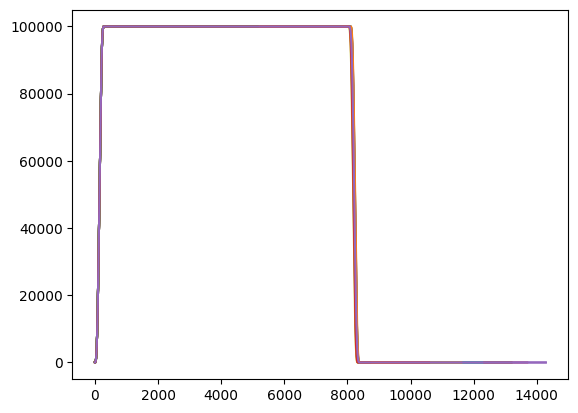

In [49]:
# #looks aligned, either way what are we going to do even if it wasnt?

# for i in train_data.columns:
#     plt.plot(train_data[i])

In [8]:
train.set_index(["file", "sample"], inplace = True)
test.set_index(["file", "sample"], inplace = True)

In [9]:
mean_target_values_train = train.groupby("sample")["target"].mean()
# mean_target_values_test = test.groupby("sample")["target"].mean() #was a mistake to do this for test aswell, the distribution should only be based on train

mean_encoder_values_train = train.groupby("sample")["ENC_POS_FLOATMAG_BH"].mean()
# mean_encoder_values_test = test.groupby("sample")["ENC_POS_FLOATMAG_BH"].mean()

In [10]:
train["mean_target"] = train.index.get_level_values("sample").map(mean_target_values_train)
test["mean_target"] = test.index.get_level_values("sample").map(mean_target_values_train) #not an error here, use the train distribution for test aswell

train["mean_encoder"] = train.index.get_level_values("sample").map(mean_encoder_values_train)
test["mean_encoder"] = test.index.get_level_values("sample").map(mean_encoder_values_train)

In [11]:
train["target_difference"] = train["target"] - train["mean_target"]
test["target_difference"] = test["target"] - test["mean_target"]

train["encoder_difference"] = train["ENC_POS_FLOATMAG_BH"] - train["mean_encoder"]
test["encoder_difference"] = test["ENC_POS_FLOATMAG_BH"] - test["mean_encoder"]

In [12]:
train = train.reset_index()[train.reset_index()["sample"] < 7500]
test = test.reset_index()[test.reset_index()["sample"] < 7500]

In [13]:
train

,file,sample,CMD_POS_FLOATMAG_BH,ENC_POS_FLOATMAG_BH,POS_ERR_FLOATMAG_BH,DAC_FLOATMAG_BH,FLOATMAG_ACC_ADC_PORT_0,dENC_X,ddENC_X,rolling_mean_ENC_POS_10,...,rolling_var_POS_ERR_30,rolling_slope_POS_ERR_30,rolling_mean_POS_ERR_50,rolling_var_POS_ERR_50,rolling_slope_POS_ERR_50,target,mean_target,mean_encoder,target_difference,encoder_difference
0,0,0,-3.0,-3.0,0.0,-203.0,-125.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,190.0,14.000000,-1.375000,176.000000,-1.625000
1,0,1,-3.0,-2.0,-1.0,-209.0,190.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-77.0,3.000000,-1.291667,-80.000000,-0.708333
2,0,2,-3.0,-2.0,-1.0,-206.0,-77.0,0.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,95.0,17.083333,-0.916667,77.916667,-1.083333
3,0,3,-3.0,-4.0,1.0,-182.0,95.0,-2.0,-2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-97.0,4.500000,-0.916667,-101.500000,-3.083333
4,0,4,-3.0,-1.0,-2.0,-191.0,-97.0,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,114.0,10.875000,-1.000000,103.125000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188509,29,7495,99997.0,99996.0,1.0,281.0,190.0,-7.0,-6.0,100001.4,...,3.086207,0.010456,-3.66,4.228980,-0.060456,-101.0,15.750000,100001.416667,-116.750000,-5.416667
188510,29,7496,99997.0,100003.0,-6.0,228.0,-101.0,7.0,14.0,100001.4,...,3.086207,-0.009566,-3.76,4.186122,-0.059448,154.0,71.750000,100002.250000,82.250000,0.750000
188511,29,7497,99997.0,99998.0,-1.0,268.0,154.0,-5.0,-12.0,100001.1,...,3.489655,0.016463,-3.76,4.186122,-0.046194,-122.0,21.833333,100001.500000,-143.833333,-3.500000
188512,29,7498,99997.0,99999.0,-2.0,250.0,-122.0,1.0,6.0,100001.0,...,3.678161,0.034705,-3.74,4.237143,-0.040192,217.0,50.333333,100000.833333,166.666667,-1.833333


In [38]:
for i in train["file"].unique():

    print(train[train["file"] == i]['encoder_difference'].max(), train[train["file"] == i]['encoder_difference'].argmax()) 

23.83333333333394 83
10.958333333328483 198
17.625 85
19.625 86
13.0 145
14.375 170
33.04166666666424 163
44.20833333332848 173
20.91666666666606 84
10.416666666671517 312
16.04166666666424 157
31.625 85
19.625 85
21.208333333328483 168
39.66666666666424 162
22.66666666666606 80
27.33333333333394 77
9.333333333328483 738
26.5 79
13.0 181
16.291666666671517 164
19.45833333333303 69
16.0 91
13.5 698


In [39]:
for i in test["file"].unique():

    print(test[test["file"] == i]['encoder_difference'].max(), test[test["file"] == i]['encoder_difference'].argmax()) 

14.416666666671517 373
36.125 167
11.615384615390212 5967
15.541666666671517 207
23.08333333333576 137
12.30434782608063 1810


In [40]:
#after segmenting the data to the first 7500 time steps only we see that the target difference is significantly less, because the second spike (which was there for some trials and not for others, and not aligned properly, was removed)

for i in train["file"].unique():

    print(train[train["file"] == i]['target_difference'].max(), train[train["file"] == i]['target_difference'].argmax()) 

398.4583333333333 517
332.6666666666667 1503
346.1363636363636 2229
291.82608695652175 1839
400.82608695652175 1640
354.91666666666697 300
393.2173913043478 1910
449.83333333333303 159
416.52173913043475 1766
424.91666666666606 188
409.875 960
329.54166666666606 206
390.0 219
373.08333333333337 1444
529.583333333333 160
357.75 1298
366.41666666666606 103
331.1363636363636 2304
347.6 2950
374.375 182
336.57142857142856 2423
342.79166666666663 1578
337.54166666666606 206
340.55 3152


In [ ]:
# train.xs(8350, level="sample")

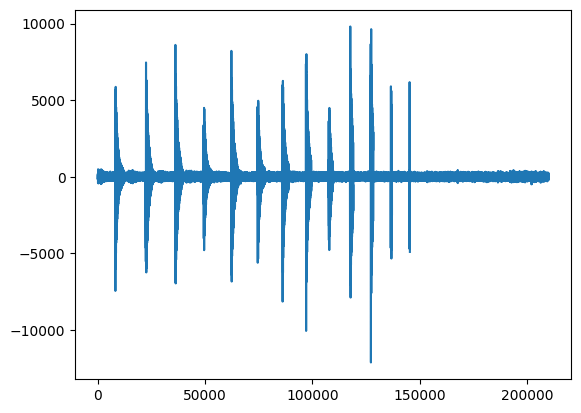

In [73]:
#with full data
plt.plot(train["target_difference"].values)

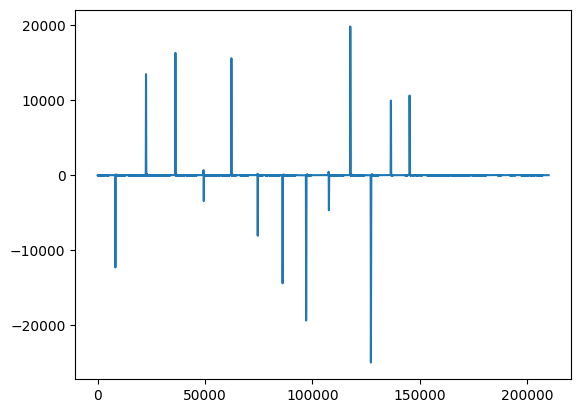

In [9]:
#also full data
#I reckon alignment should be based on the command position as I dont think that changes
#or something definetely there with the cmd position that we should explore
#Questions to ask:
#  Does the command position get updated as the run progresses?
#  Is it the same motion profile every time?
plt.plot(train["encoder_difference"].values)

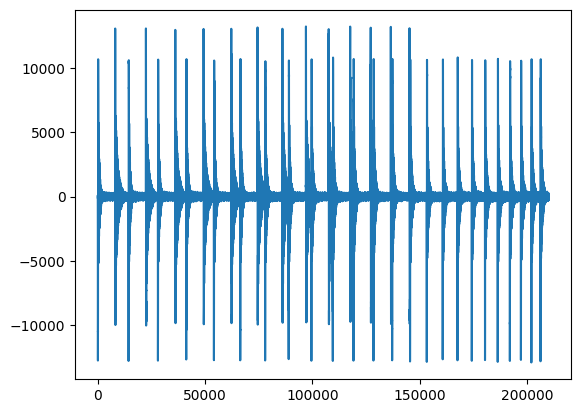

In [82]:
#also full data
plt.plot(train["target"].values)

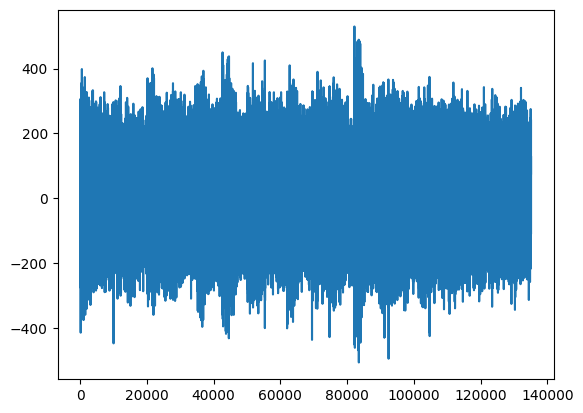

In [41]:
#data segmented to first 7500 time steps
plt.plot(train["target_difference"].values)

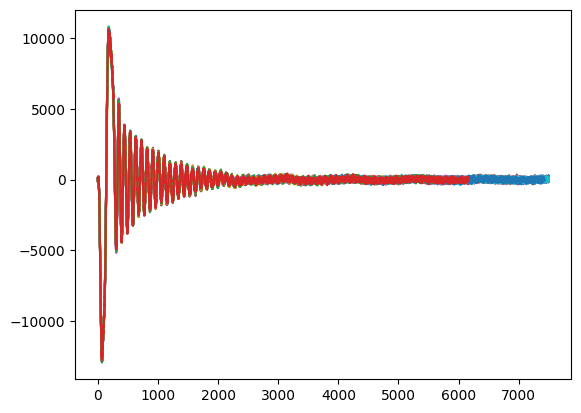

In [42]:

for series in train.groupby("file")["target"]:
    plt.plot(series[1].values)

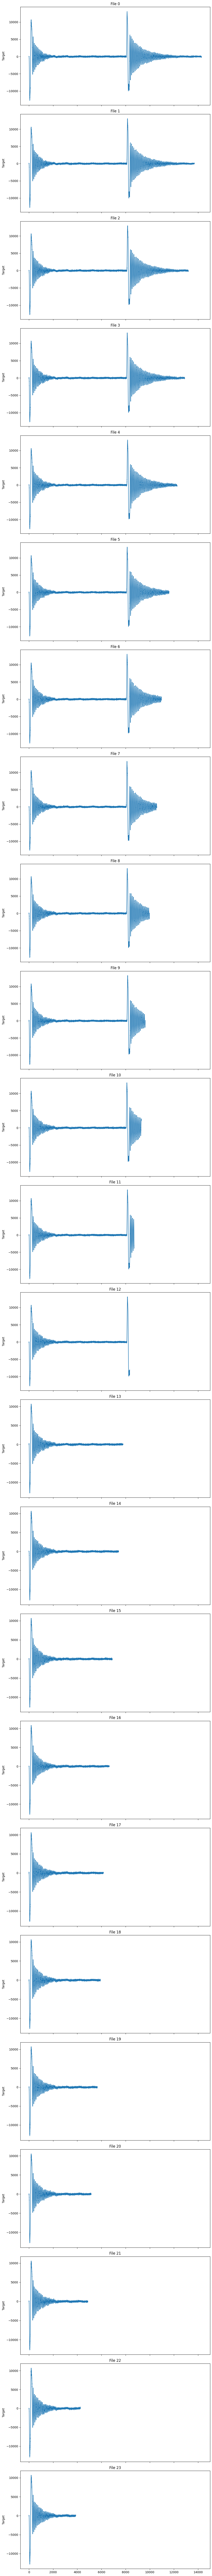

In [81]:
#for full data, (not segmented to first 7500 samples)
# Get the number of unique 'file' values to determine the number of subplots needed
num_files = train.index.get_level_values("file").nunique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_files, 1, figsize=(10, 5*num_files), sharex=True) # Adjust the figure size as needed

# Iterate over each group from groupby
for (file, data), ax in zip(train.groupby("file")["target"], axes):
    # Plot the 'target' series in its own subplot
    ax.plot(data.values)
    ax.set_title(f'File {file}')
    ax.set_ylabel('Target')

# Show the plot with subplots stacked vertically
plt.tight_layout()
plt.show()

In [21]:


train_columns = train.columns.drop(["file", "sample", "CMD_POS_FLOATMAG_BH", "FLOATMAG_ACC_ADC_PORT_0", "target", "mean_target", "mean_encoder"])

In [22]:
train_columns

Index(['ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH',
       'dENC_X', 'ddENC_X', 'rolling_mean_ENC_POS_10',
       'rolling_var_ENC_POS_10', 'rolling_slope_ENC_POS_10',
       'rolling_mean_ENC_POS_30', 'rolling_var_ENC_POS_30',
       'rolling_slope_ENC_POS_30', 'rolling_mean_ENC_POS_50',
       'rolling_var_ENC_POS_50', 'rolling_slope_ENC_POS_50', 'dDAC', 'ddDAC',
       'rolling_mean_DAC_10', 'rolling_var_DAC_10', 'rolling_slope_DAC_10',
       'rolling_mean_DAC_30', 'rolling_var_DAC_30', 'rolling_slope_DAC_30',
       'rolling_mean_DAC_50', 'rolling_var_DAC_50', 'rolling_slope_DAC_50',
       'dPOS_ERR', 'ddPOS_ERR', 'rolling_mean_POS_ERR_10',
       'rolling_var_POS_ERR_10', 'rolling_slope_POS_ERR_10',
       'rolling_mean_POS_ERR_30', 'rolling_var_POS_ERR_30',
       'rolling_slope_POS_ERR_30', 'rolling_mean_POS_ERR_50',
       'rolling_var_POS_ERR_50', 'rolling_slope_POS_ERR_50',
       'target_difference', 'encoder_difference'],
      dtype='object')

In [23]:
#now lets fit a dense model to the data

X = train[train_columns].dropna()
y = X.pop("target_difference")
y = np.expand_dims(y, axis=-1)

X_test = test[train_columns].dropna()
y_test = X_test.pop("target_difference")
y_test = np.expand_dims(y_test, axis=1)

In [24]:
X.shape, y.shape, X_test.shape, y_test.shape

((147498, 37), (147498, 1), (28578, 37), (28578, 1))

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Normalization

mae = tf.keras.metrics.mean_absolute_error

2023-11-10 03:36:11.686321: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 03:36:11.824352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 03:36:11.824454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 03:36:11.824886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 03:36:11.906615: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 03:36:11.908974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
#I guess we should probably also calulate the difference from mean for the encoder data aswell due to the large variation in encoder data

In [26]:
input_norm = Normalization(axis=-1)

input_norm.adapt(X)

2023-11-10 03:36:18.536173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-10 03:36:18.536557: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
# output_norm = Normalization(axis=-1)

# output_norm.adapt(y)

In [28]:
model = Sequential([
    input_norm,
    Dense(200),
    Dense(50),
    Dense(50),
    Dense(20),
    Dense(1)  # Output layer with 1 unit
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [30]:
one_trial_columns = train_columns.extend(["mean_target", "target"])

Index(['ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH',
       'dENC_X', 'ddENC_X', 'rolling_mean_ENC_POS_10',
       'rolling_var_ENC_POS_10', 'rolling_slope_ENC_POS_10',
       'rolling_mean_ENC_POS_30', 'rolling_var_ENC_POS_30',
       'rolling_slope_ENC_POS_30', 'rolling_mean_ENC_POS_50',
       'rolling_var_ENC_POS_50', 'rolling_slope_ENC_POS_50', 'dDAC', 'ddDAC',
       'rolling_mean_DAC_10', 'rolling_var_DAC_10', 'rolling_slope_DAC_10',
       'rolling_mean_DAC_30', 'rolling_var_DAC_30', 'rolling_slope_DAC_30',
       'rolling_mean_DAC_50', 'rolling_var_DAC_50', 'rolling_slope_DAC_50',
       'dPOS_ERR', 'ddPOS_ERR', 'rolling_mean_POS_ERR_10',
       'rolling_var_POS_ERR_10', 'rolling_slope_POS_ERR_10',
       'rolling_mean_POS_ERR_30', 'rolling_var_POS_ERR_30',
       'rolling_slope_POS_ERR_30', 'rolling_mean_POS_ERR_50',
       'rolling_var_POS_ERR_50', 'rolling_slope_POS_ERR_50',
       'target_difference', 'encoder_difference'],
      dtype='object')

In [32]:
one_trial_file_index = test["file"].unique()[3]
print(f"one trial file index: {one_trial_file_index}")

one_trial_columns = list(train_columns)
one_trial_columns.extend(["mean_target", "target"])

one_trial_test = test[test["file"] == one_trial_file_index]

X_test_one_trial = one_trial_test[one_trial_columns].dropna()

y_test_one_trial = X_test_one_trial.pop("target_difference")
y_test_one_trial = np.expand_dims(y_test_one_trial, axis=1)

y_mean_one_trial = X_test_one_trial.pop("mean_target")
y_mean_one_trial = np.expand_dims(y_mean_one_trial, axis=1)

y_target_one_trial = X_test_one_trial.pop("target")
y_target_one_trial = np.expand_dims(y_target_one_trial, axis=1)

one trial file index: 16


In [33]:
X_test_one_trial.shape, y_test_one_trial.shape, y_mean_one_trial.shape, y_target_one_trial.shape

((2694, 37), (2694, 1), (2694, 1), (2694, 1))

In [37]:
# inverse_output_norm = Normalization(axis=-1, invert=True)

# inverse_output_norm.adapt(y)

mae reference: 115.513
epoch 0
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12871.3799 - mae: 92.0394 - val_loss: 15931.1641 - val_mae: 103.3423
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


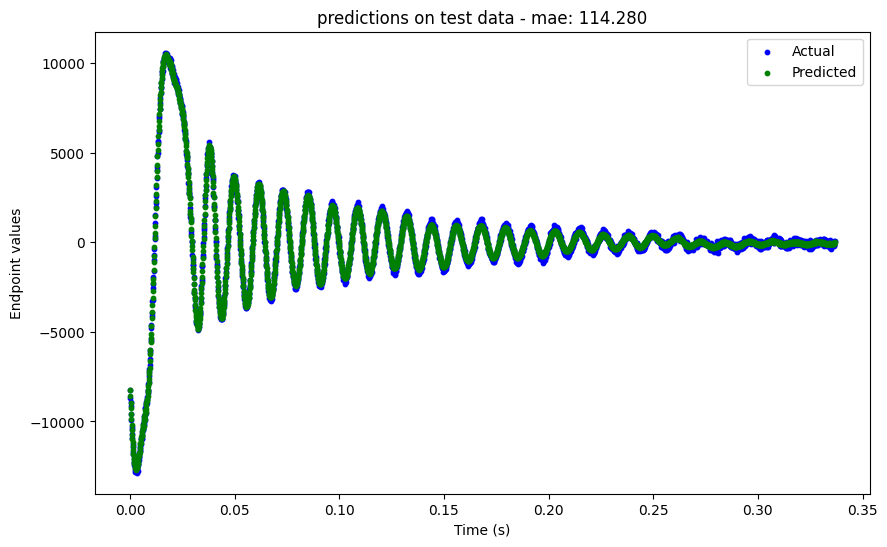

epoch 1
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12842.6426 - mae: 91.9328 - val_loss: 16067.5430 - val_mae: 103.6930
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


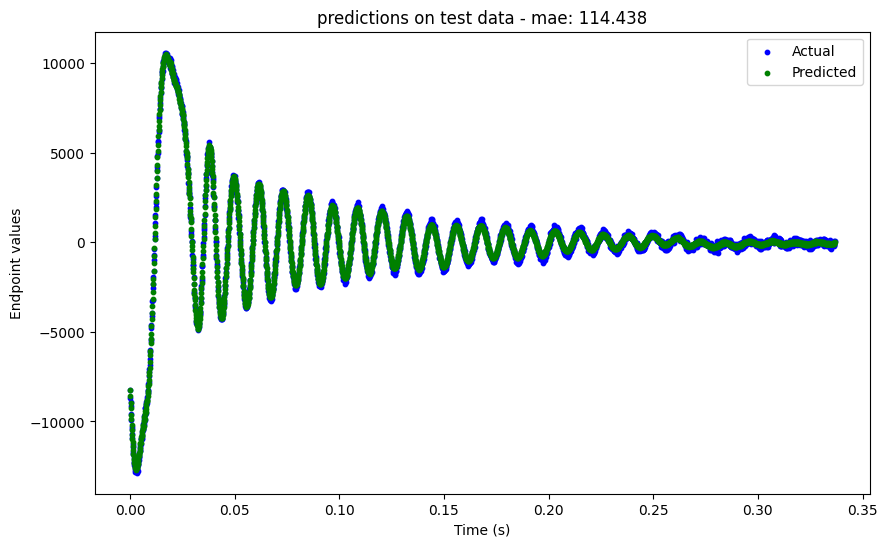

epoch 2
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12840.4590 - mae: 91.9222 - val_loss: 15942.6934 - val_mae: 103.3764
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


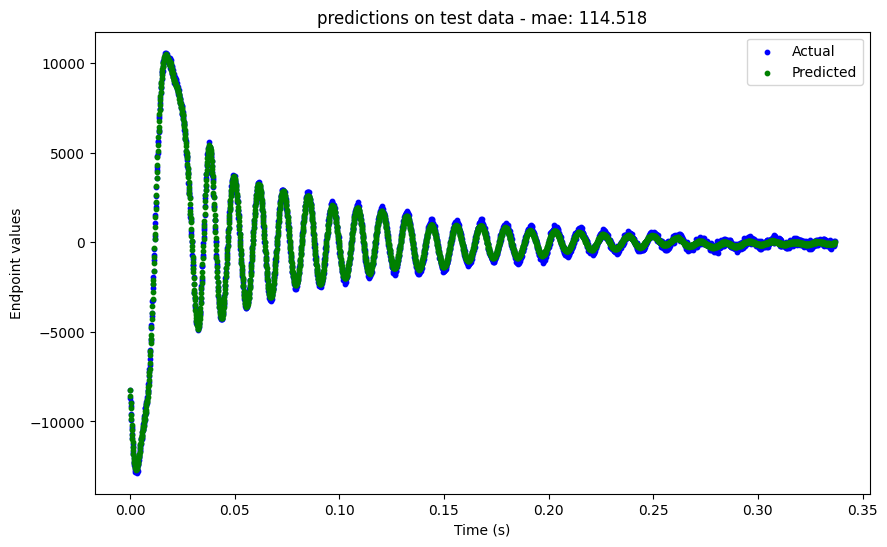

epoch 3
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12835.9590 - mae: 91.9199 - val_loss: 15951.0605 - val_mae: 103.3983
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


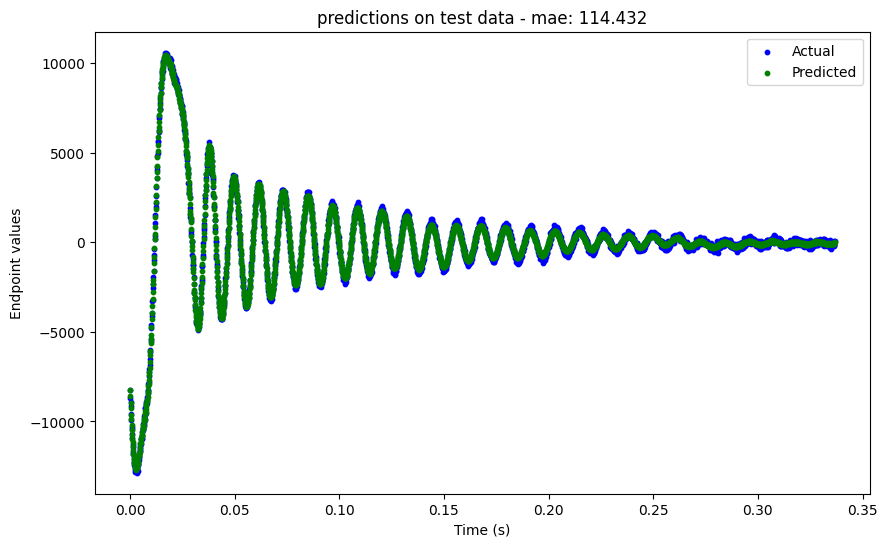

epoch 4
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 12835.3369 - mae: 91.9034 - val_loss: 15960.9180 - val_mae: 103.4235
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


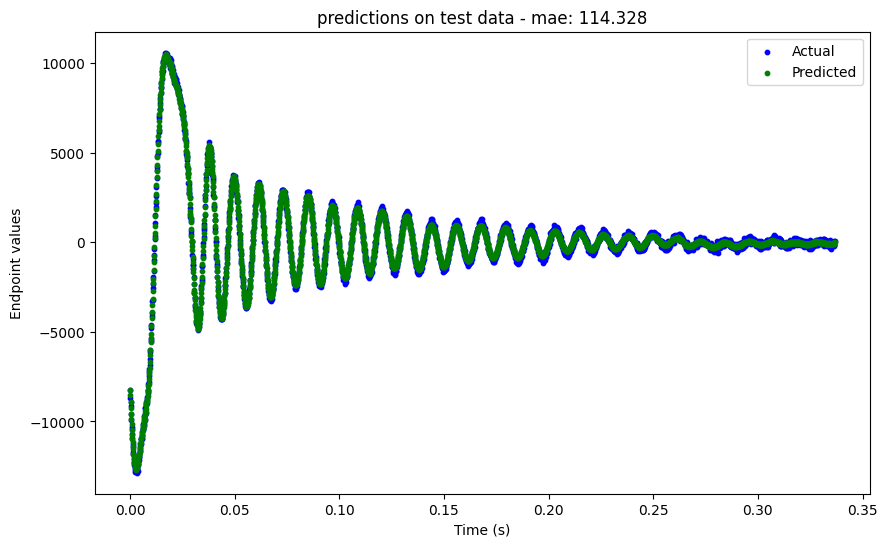

epoch 5
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 12834.1602 - mae: 91.9053 - val_loss: 15913.5469 - val_mae: 103.2960
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


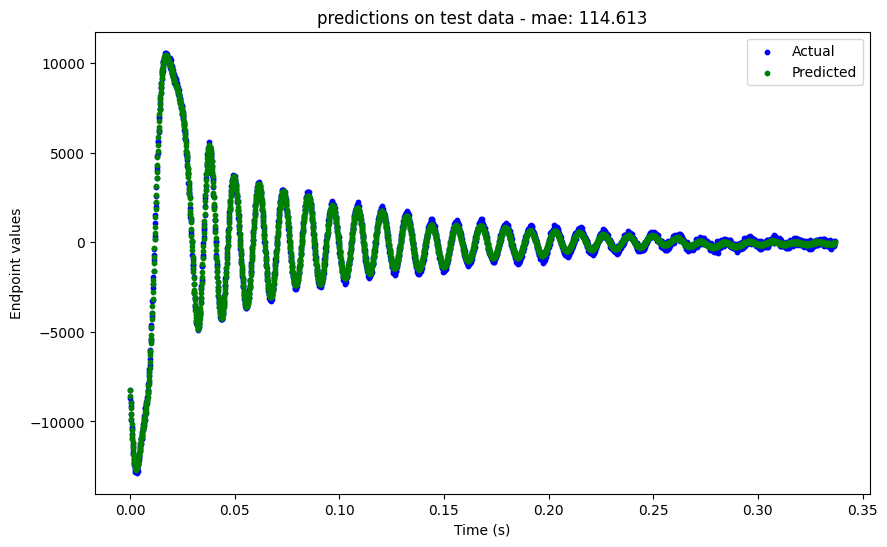

epoch 6
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12831.5674 - mae: 91.9031 - val_loss: 15908.8018 - val_mae: 103.2731
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


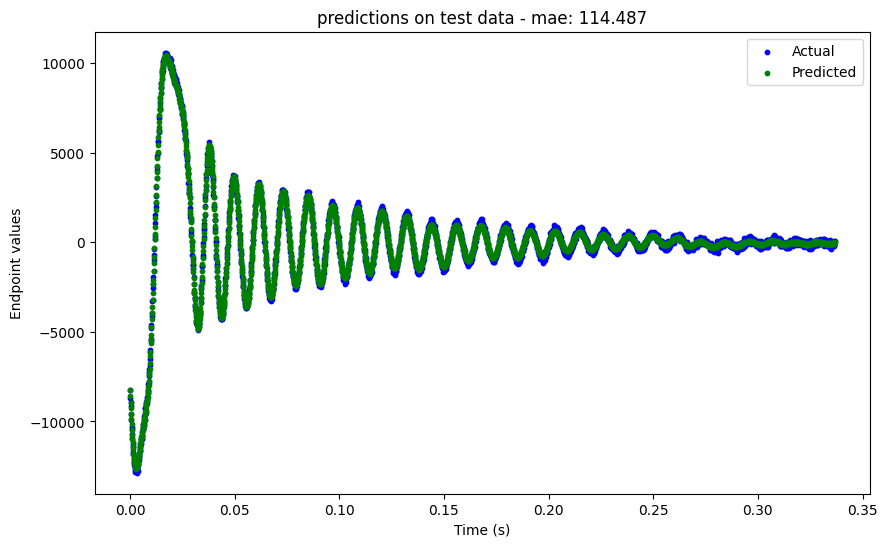

epoch 7
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12830.4082 - mae: 91.8995 - val_loss: 15922.9971 - val_mae: 103.3278
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


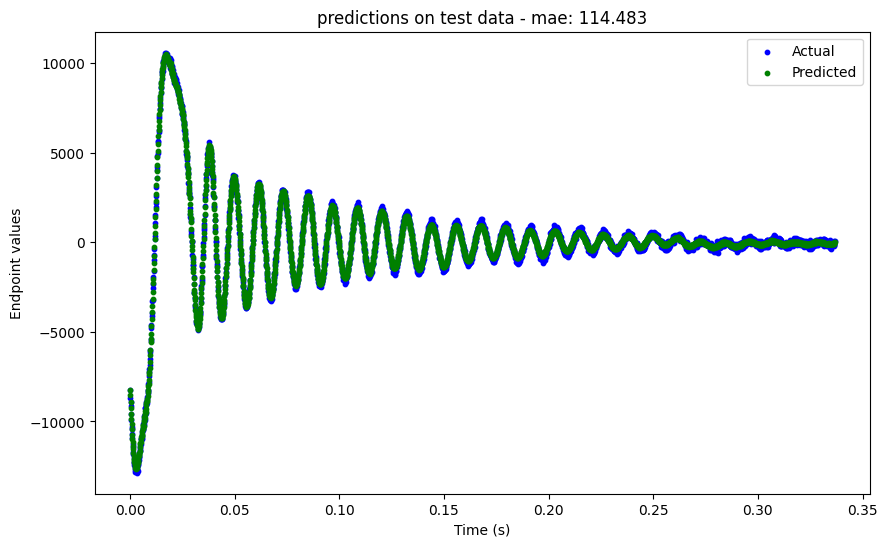

epoch 8
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12830.3633 - mae: 91.8928 - val_loss: 15913.2803 - val_mae: 103.2877
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


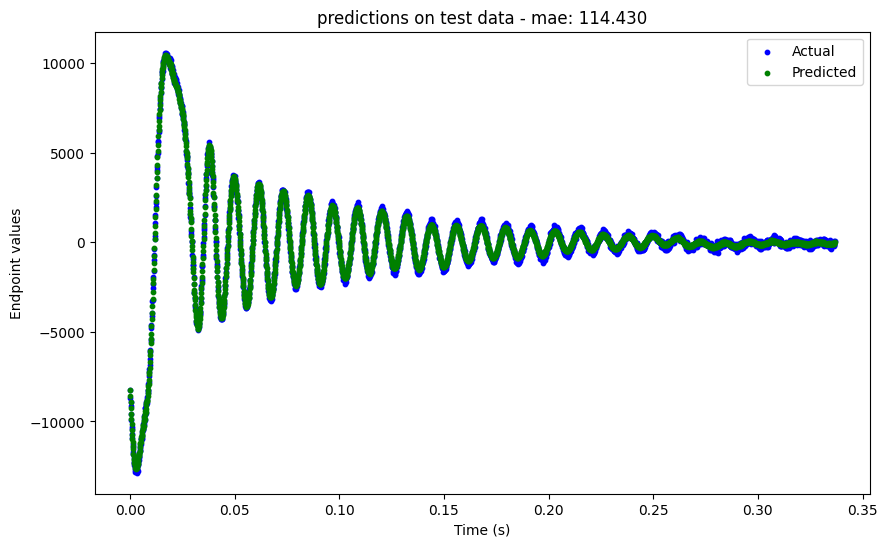

epoch 9
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 12829.9229 - mae: 91.9012 - val_loss: 15909.6592 - val_mae: 103.2711
Epoch 2/2
85/85 [==============================] - 0s 930us/step


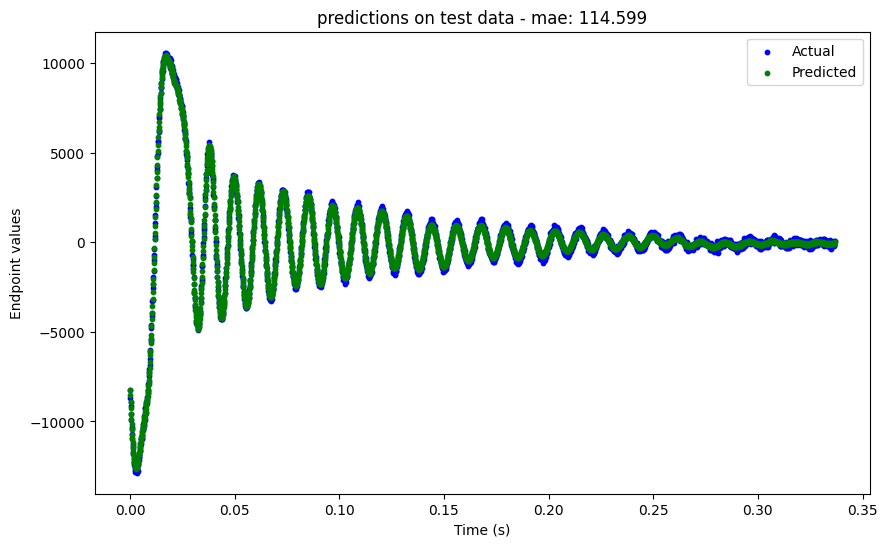

In [35]:
mae_reference = mae(y_target_one_trial.flatten(), y_mean_one_trial.flatten()) #for reference, this is the value we would get if model predicts 0 every time. (just the difference between the mean and the target)

print(f"mae reference: {mae_reference:.3f}")

for i in range(10):
    print(f"epoch {i}")

    
    # history = model.fit(X, output_norm(y), epochs=2, batch_size=32, validation_data = (X_test, output_norm(y_test))) #with output norm
    history = model.fit(X, y, epochs=2, batch_size=32, validation_data = (X_test, y_test)) #without output norm

    times = np.array(range(len(X_test_one_trial))) / 8000

    predictions_one_trial_raw = model.predict(X_test_one_trial)

    # predictions_one_trial_inversed = inverse_output_norm(predictions_one_trial_raw).numpy() #with output norm
    predictions_one_trial_inversed = predictions_one_trial_raw #without output norm

    #adding predictions to mean target to get actual prediction value:
    predictions_one_trial_actual = predictions_one_trial_inversed + y_mean_one_trial 
    
    mae_test = mae(y_target_one_trial.flatten(), predictions_one_trial_actual.flatten())
    # mae_test = mae(y_test_one_trial.flatten(), inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy().flatten())

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(times, y_target_one_trial.flatten(), color='blue', label='Actual', s = 10)
    plt.scatter(times, predictions_one_trial_actual.flatten(), color='green', label='Predicted', s=10)
    # plt.scatter(times, inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy(), color='green', label='Predicted', s=10)


    # plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
    plt.title(f'predictions on test data - mae: {mae_test:.3f}')

    plt.xlabel('Time (s)')
    plt.ylabel('Endpoint values')
    plt.legend()
    plt.show()

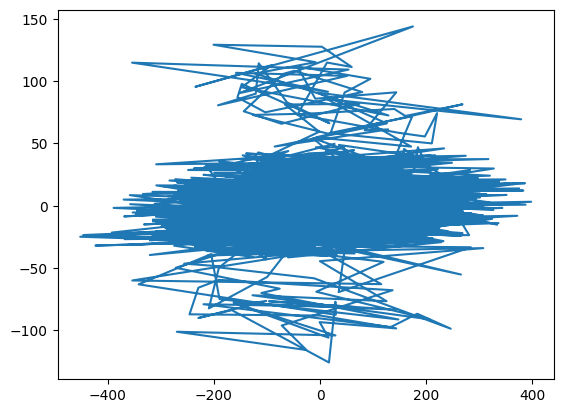

In [36]:
# plt.plot(predictions_one_trial_inversed)
plt.plot(y_test_one_trial, predictions_one_trial_inversed)

In [49]:
np.corrcoef(y_test_one_trial.flatten(), predictions_one_trial_inversed.flatten())

array([[1.       , 0.0752216],
       [0.0752216, 1.       ]])